In [1]:
import pandas as pd
import re

In [234]:
f = open('/content/drive/MyDrive/Colab Notebooks/mnist_mmd-gan_0.log', 'r').read().split('\n')

In [235]:
type(f)

list

In [236]:
f[0]

"Namespace(dataset='mnist', dataroot='./data', workers=4, batch_size=64, image_size=32, nc=1, nz=10, max_iter=1000, lr=5e-05, gpu_device=0, netG='', netD='', Diters=5, experiment='mnist_mmd-gan')"

In [237]:
f[52]

'[  0/1000][101/938] [    1] (0.08 m) MMD2_D 0.006443 hinge -0.000000 L2_AE_X 0.206355 L2_AE_Y 0.043809 loss_D -1.921044 Loss_G 0.078190 f_X 0.014607 f_Y -0.000689 |gD| 9.8557 |gG| 0.0551'

In [238]:
def extract_first_number(string):
    # Using regex to find the first number in the string
    match = re.search(r'\d+', string)

    # If a match is found, return the matched number
    if match:
        return int(match.group())
    else:
        return None  # Return None if no number is found

In [239]:
def extract_first_float(string):
    # Using regex to find the first float number in the string
    match = re.search(r'\d+\.\d+', string)
    # If a match is found, return the matched number
    if match:
        return float(match.group())
    else:
        return None  # Return None if no number is found

In [240]:
extract_first_number(f[52])

0

In [241]:
len(f)

150693

In [242]:
len(f[52].split(')'))

2

In [243]:
f[52]

'[  0/1000][101/938] [    1] (0.08 m) MMD2_D 0.006443 hinge -0.000000 L2_AE_X 0.206355 L2_AE_Y 0.043809 loss_D -1.921044 Loss_G 0.078190 f_X 0.014607 f_Y -0.000689 |gD| 9.8557 |gG| 0.0551'

In [244]:
the_rest = [i.split(')')[1] for i in f[52:-1]]

In [245]:
len(the_rest)

150640

In [246]:
the_rest[0]

' MMD2_D 0.006443 hinge -0.000000 L2_AE_X 0.206355 L2_AE_Y 0.043809 loss_D -1.921044 Loss_G 0.078190 f_X 0.014607 f_Y -0.000689 |gD| 9.8557 |gG| 0.0551'

In [247]:
MMD_measures = [extract_first_float(i) for i in the_rest]

In [248]:
MMD_measures[0], MMD_measures[-1]

(0.006443, 2e-05)

In [249]:
the_rest[-1]

' MMD2_D 0.000020 hinge -0.000380 L2_AE_X 0.022983 L2_AE_Y 0.018258 loss_D -0.331539 Loss_G -0.001218 f_X -0.001587 f_Y -0.001924 |gD| 11.6750 |gG| 0.0505'

In [250]:
the_first = [i.split(')')[0] for i in f[52:-1]]

In [251]:
the_first[0], the_first[-1]

('[  0/1000][101/938] [    1] (0.08 m',
 '[999/1000][938/938] [149640] (400.39 m')

In [252]:
epoch_numbers = [extract_first_number(i) for i in the_first]

In [253]:
epoch_numbers[0], epoch_numbers[-1]

(0, 999)

In [254]:
df = pd.DataFrame({'epoch': epoch_numbers, 'MMD': MMD_measures})

In [255]:
df.head()

,epoch,MMD
0,0,0.006443
1,0,0.005984
2,0,0.006301
3,0,0.007435
4,0,0.007849


In [256]:
# df_2 = df.groupby('epoch').mean()

In [257]:
import matplotlib.pyplot as plt

In [258]:
# Define the window size for the moving average
window_size = 500  # Adjust this value as needed

# Calculate the moving average of the error metric column
moving_avg = df['MMD'].rolling(window=window_size).mean()

# Optionally, drop rows with missing values resulting from the rolling calculation
moving_avg = moving_avg.dropna()

In [259]:
moving_avg

499       0.116237
500       0.116262
501       0.116297
502       0.116325
503       0.116356
            ...   
150635    0.000011
150636    0.000011
150637    0.000011
150638    0.000011
150639    0.000011
Name: MMD, Length: 150141, dtype: float64

In [260]:
moving_avg = moving_avg.to_frame()

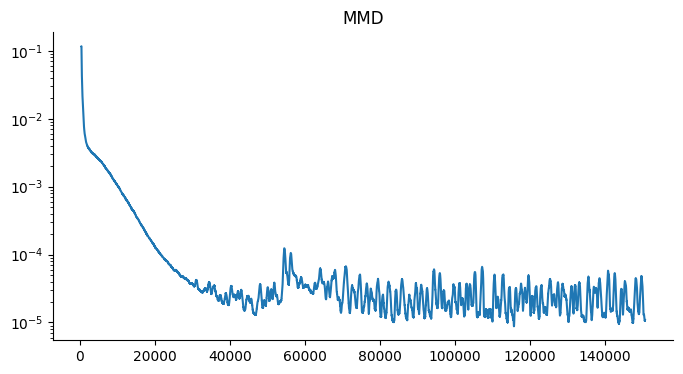

In [261]:
from matplotlib import pyplot as plt
moving_avg['MMD'].plot(kind='line', figsize=(8, 4), title='MMD')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.yscale('log')

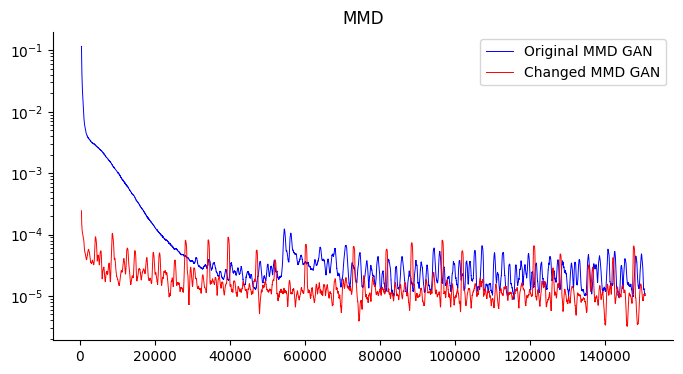

In [265]:
# Plot the first dataset
moving_avg_for_original['MMD'].plot(kind='line', figsize=(8, 4), title='MMD', label='Original MMD GAN', color='blue', linewidth=0.7)

# Plot the second dataset
moving_avg_for_changed['MMD'].plot(kind='line', figsize=(8, 4), title='MMD', label='Changed MMD GAN', color='red', linewidth=0.7)

# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Set logarithmic scale for the y-axis (base 10)
plt.yscale('log')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [233]:
moving_avg_for_changed = moving_avg

In [262]:
moving_avg_for_original = moving_avg